# "Quick look" plots
---
Use `spaxelsleuth` to make nice summary plots for a given galaxy. 

In [1]:
%matplotlib widget

In [2]:
# Imports
import sys
import os 
import numpy as np
import pandas as pd
from astropy.visualization import hist
from astropy.io import fits

from spaxelsleuth.loaddata.sami import load_sami_df
from spaxelsleuth.plotting.plot2dmap import plot2dmap
from spaxelsleuth.plotting.sdssimg import plot_sdss_image
from spaxelsleuth.plotting.plottools import plot_empty_BPT_diagram, plot_BPT_lines
from spaxelsleuth.plotting.plottools import vmin_fn, vmax_fn, label_fn, cmap_fn, component_colours
from spaxelsleuth.plotting.plotgalaxies import plot2dscatter, plot2dhistcontours

import matplotlib
from matplotlib import rc, rcParams
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from IPython.core.debugger import Tracer

rc("text", usetex=False)
rc("font",**{"family": "serif", "size": 12})
rcParams["savefig.bbox"] = "tight"
rcParams["savefig.format"] = "pdf"
plt.ion()
plt.close("all")


In [3]:
###########################################################################
# Paths
###########################################################################
assert "SAMI_DIR" in os.environ, "Environment variable SAMI_DIR is not defined!"
sami_data_path = os.environ["SAMI_DIR"]
assert "SAMI_DATACUBE_DIR" in os.environ, "Environment variable SAMI_DATACUBE_DIR is not defined!"
sami_datacube_path = os.environ["SAMI_DATACUBE_DIR"]

In [4]:
###########################################################################
# Options
###########################################################################
savefigs = True
bin_type = "default"    # Options: "default" or "adaptive" for Voronoi binning
ncomponents = "recom"   # Options: "1" or "recom"
eline_SNR_min = 5       # Minimum S/N of emission lines to accept

In [5]:
###########################################################################
# Load the SAMI sample
###########################################################################
df = load_sami_df(ncomponents=ncomponents,
                  bin_type=bin_type,
                  eline_SNR_min=eline_SNR_min,
                  correct_extinction=True)

In load_sami_df(): Loading DataFrame from file /priv/meggs3/u5708159/SAMI/sami_dr3/sami_default_recom-comp_extcorr_minSNR=5.hd5 [last modified 2022-12-14 11:31:32.507328]...
In load_sami_df(): Finished!


In [9]:
###########################################################################
# Select a galaxy
###########################################################################
gal = 41144
assert gal in df["ID"].values, f"{gal} not found in DataFrame!"
df_gal = df[df["ID"] == gal]

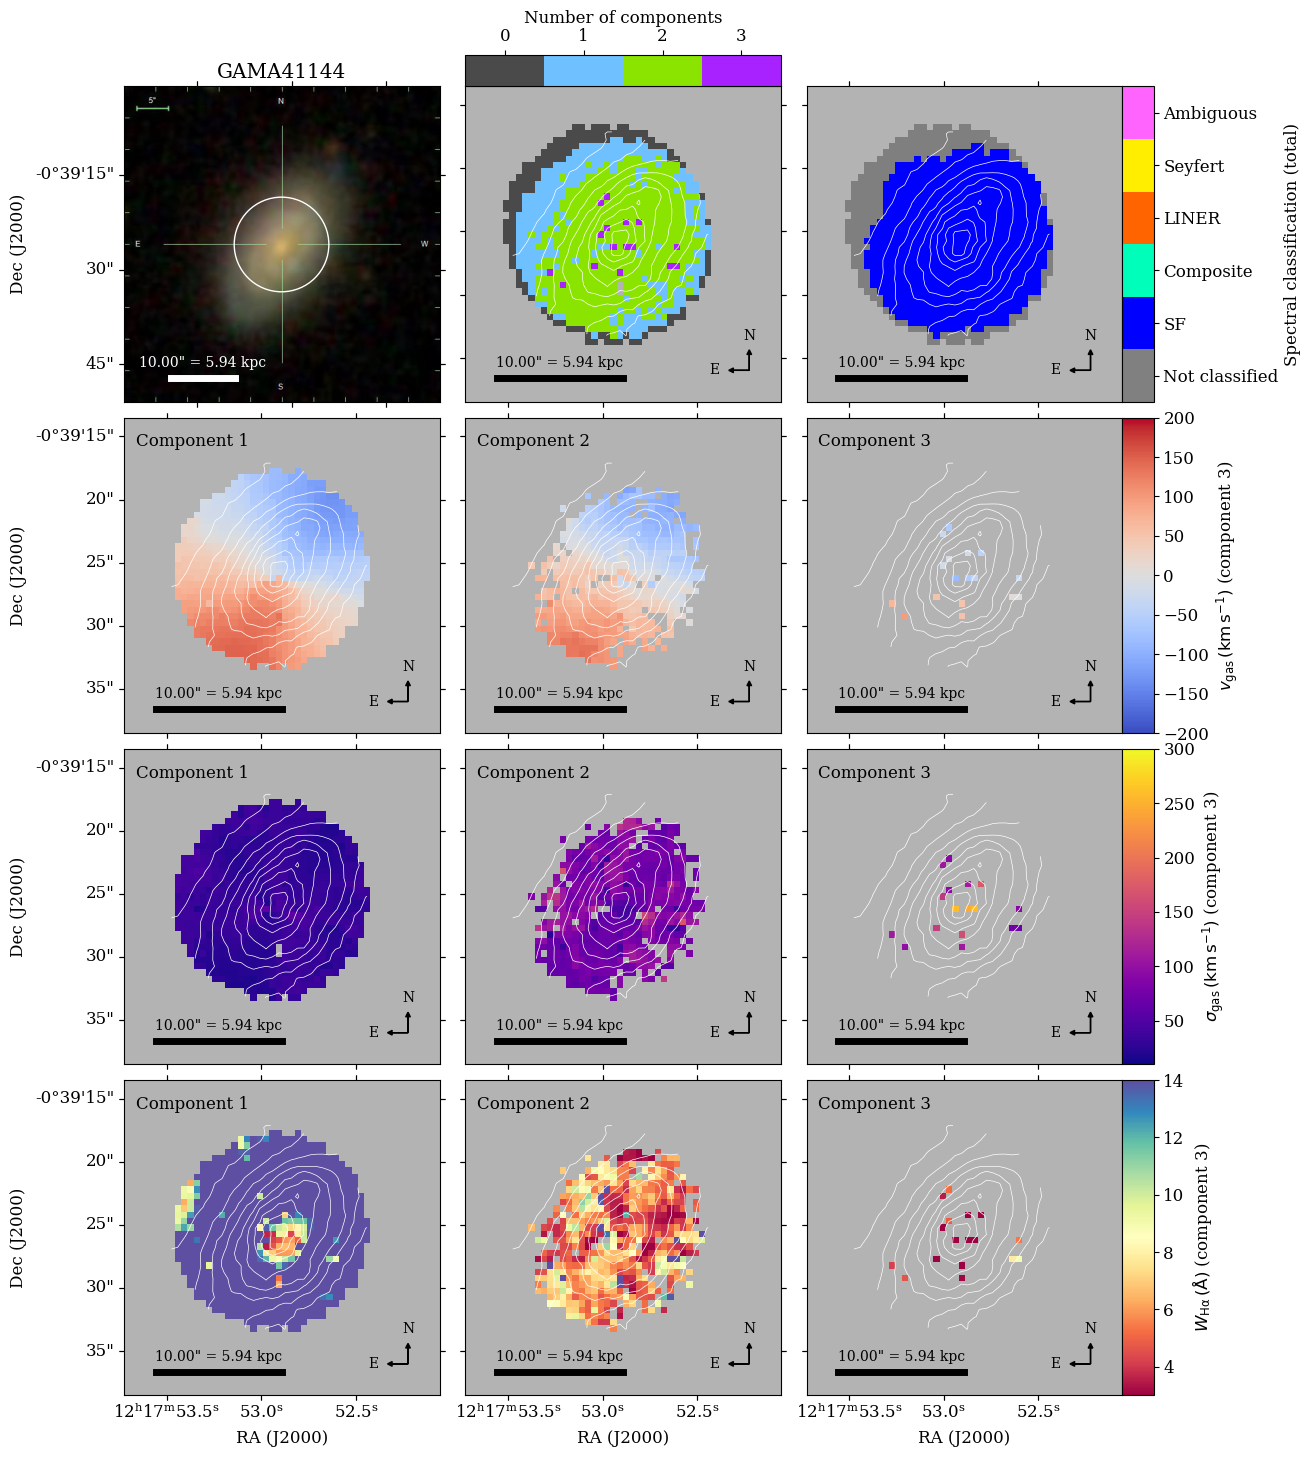

In [10]:
###########################################################################
# Create a collage figure displaying various quantities of interest for 
# this galaxy
###########################################################################
# layout:
# SDSS image | number of components | BT classifications
# delta sigma: 1 | 2 | 3
# EW: 1 | 2 | 3
# BPT
# WHAN | WHAV

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(13, 17))
fig.subplots_adjust(wspace=0.05, hspace=0.05)

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# SDSS image 
ax = plot_sdss_image(df_gal, ax=axs[0][0])
if ax is not None:
    ax.set_title(f"GAMA{gal}")
    lon = ax.coords[0]
    lon.set_ticklabel_visible(False)

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# Number of components
_, ax = plot2dmap(df_gal=df_gal, bin_type="default", survey="sami",
          PA_deg=0,
          col_z="Number of components",
          ax=axs[0][1], 
          plot_colorbar=True, cax=None, cax_orientation="horizontal", 
          show_title=False)
lon = ax.coords[0]
lon.set_ticklabel_visible(False)
lat = ax.coords[1]
lat.set_ticklabel_visible(False)

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# BPT classifications 
_, ax = plot2dmap(df_gal=df_gal, bin_type="default", survey="sami",
          PA_deg=0,
          col_z="BPT (numeric) (total)",
          ax=axs[0][2], 
          plot_colorbar=True, cax=None, cax_orientation="vertical", 
          show_title=False)
lon = ax.coords[0]
lon.set_ticklabel_visible(False)
lat = ax.coords[1]
lat.set_ticklabel_visible(False)

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# v_gas
for nn in range(3):
    _, ax = plot2dmap(df_gal=df_gal, bin_type="default", survey="sami",
              PA_deg=0,
              col_z=f"v_gas (component {nn + 1})",
              ax=axs[1][nn], 
              plot_colorbar=True if nn == 2 else False, cax=None, cax_orientation="vertical", 
              vmin=-200, vmax=+200,
              show_title=False)
    ax.text(s=f"Component {nn + 1}", x=0.05, y=0.95, transform=axs[1][nn].transAxes, verticalalignment="top")
    if nn > 0:
        lat = ax.coords[1]
        lat.set_ticklabel_visible(False)
    lon = ax.coords[0]
    lon.set_ticklabel_visible(False)

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# sigma_gas
for nn in range(3):
    _, ax = plot2dmap(df_gal=df_gal, bin_type="default", survey="sami",
              PA_deg=0,
              col_z=f"sigma_gas (component {nn + 1})",
              ax=axs[2][nn], 
              plot_colorbar=True if nn == 2 else False, cax=None, cax_orientation="vertical", 
              vmin=10, vmax=300,
              show_title=False)
    ax.text(s=f"Component {nn + 1}", x=0.05, y=0.95, transform=axs[2][nn].transAxes, verticalalignment="top")
    if nn > 0:
        lat = ax.coords[1]
        lat.set_ticklabel_visible(False)
    lon = ax.coords[0]
    lon.set_ticklabel_visible(False)

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# EW 
for nn in range(3):
    _, ax = plot2dmap(df_gal=df_gal, bin_type="default", survey="sami",
              PA_deg=0,
              col_z=f"HALPHA EW (component {nn + 1})",
              ax=axs[3][nn], 
              plot_colorbar=True if nn == 2 else False, cax=None, cax_orientation="vertical", 
              show_title=False)
    ax.text(s=f"Component {nn + 1}", x=0.05, y=0.95, transform=axs[3][nn].transAxes, verticalalignment="top")
    if nn > 0:
        lat = ax.coords[1]
        lat.set_ticklabel_visible(False)
        

[None, None, None]

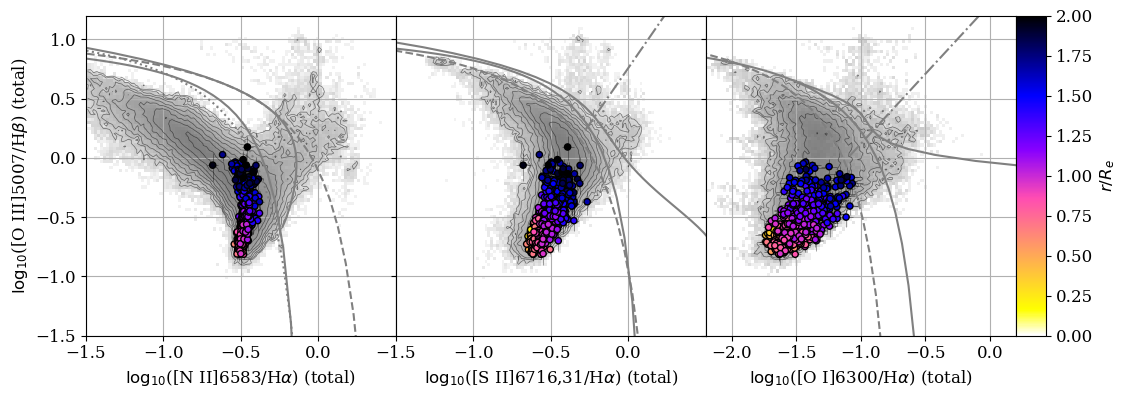

In [11]:
###########################################################################
# Optical diagnostic (i.e. BPT) diagram
###########################################################################
fig, axs, cax = plot_empty_BPT_diagram(colorbar=True, nrows=1, include_Law2021=True, figsize=(12, 4))
markers = ["o", ">", "D"]
col_z = "r/R_e"
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Plot full SAMI sample
    plot2dhistcontours(df=df, 
                       col_x=f"{col_x} (total)",
                       col_y=f"log O3 (total)", col_z="count", log_z=True,
                       alpha=0.5, cmap="gray_r",
                       ax=axs[cc], plot_colorbar=False)

    # Plot measurements for this galaxy
    plot2dscatter(df=df_gal,
                  col_x=f"{col_x} (total)",
                  col_y=f"log O3 (total)",
                  col_z=col_z,
                  cax=cax,
                  marker="o", ax=axs[cc], 
                  markersize=20, 
                  markeredgecolor="black",
                  plot_colorbar=True if cc == 2 else False)

    # axis limits
    axs[cc].set_xlim([np.nanmin([vmin_fn(col_x), df_gal[f"{col_x} (total)"].min() - 0.1]),
                      np.nanmax([vmax_fn(col_x), df_gal[f"{col_x} (total)"].max() + 0.1])])
    # axis limits
    axs[cc].set_ylim([np.nanmin([vmin_fn("log O3"), df_gal[f"log O3 (total)"].min() - 0.1]),
                      np.nanmax([vmax_fn("log O3"), df_gal[f"log O3 (total)"].max() + 0.1])])

# Decorations
[ax.grid() for ax in axs]
[ax.set_ylabel("") for ax in axs[1:]]
[ax.set_yticklabels([]) for ax in axs[1:]]
[ax.set_xticks(ax.get_xticks()[:-1]) for ax in axs[:-1]]
[ax.collections[0].set_rasterized(True) for ax in axs]
